In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
data_path = "/home/u01085/mizuho/提供データ"    # これはなんか適当に変えてください

In [3]:
!ls /home/u00232/dss/share24S/mizuho/提供データ

_readme.txt		  train_labels.csv	 学習用正解ラベル.xlsx
head			  train_market_data.csv  評価用データ.xlsx
train_indicator_data.csv  学習用データ.xlsx	 評価用正解ラベル.xlsx


In [4]:
in_charge = os.path.join(data_path, "学習用データ.xlsx") #学習用データ 
df = pd.read_excel(in_charge)

In [ ]:
df_header = df.iloc[[1,3,4,5]]
col_name = df_header.apply(lambda x: '_'.join(x.astype(str)), axis=0)
df_data = df[6:].reset_index(drop=True)
df_data.columns
df_data.columns = col_name
df_data.set_index('データ種類_カテゴリ_nan_Dates', inplace=True)
df_data.head(5)

# NaN以外の非数が存在するか
→なし

In [ ]:
# 数値でない部分を取り出す関数
def extract_non_numeric(series):
    return series[~series.apply(lambda x: isinstance(x, (int, float)))]

# 各列から数値でない部分を取り出す
non_numeric_data = df_data.apply(extract_non_numeric)
non_numeric_data

# NaNの発生する傾向は？

In [6]:
def make_nanplot(tmp_df):
    index_dict = {f"col{i}": tmp_df.columns[i] for i in range(len(tmp_df.columns))}
    tmp_df.columns = [f"col{i}" for i in range(len(tmp_df.columns))]

    # NaNが発生した時点を抽出する
    nan_data = tmp_df[tmp_df.isna().any(axis=1)]

    plt.figure(figsize=(15, 10))

    # 各列に対してNaNが発生した時点をプロットする
    for column in nan_data.columns:
        nan_times = nan_data.index[nan_data[column].isna()]
        plt.scatter(nan_times, [column]*len(nan_times), label=f'NaN in {column}')
    plt.title(f'NaN Occurrences in {column}')
    plt.xlabel('Time')
    plt.ylabel('NaN')
    plt.show()
    return index_dict

def create_new_dict(d1, d2):
    new_dict = {}
    for key, intermediate_key in d1.items():
        if intermediate_key in d2:
            new_dict[key] = d2[intermediate_key]
    return new_dict

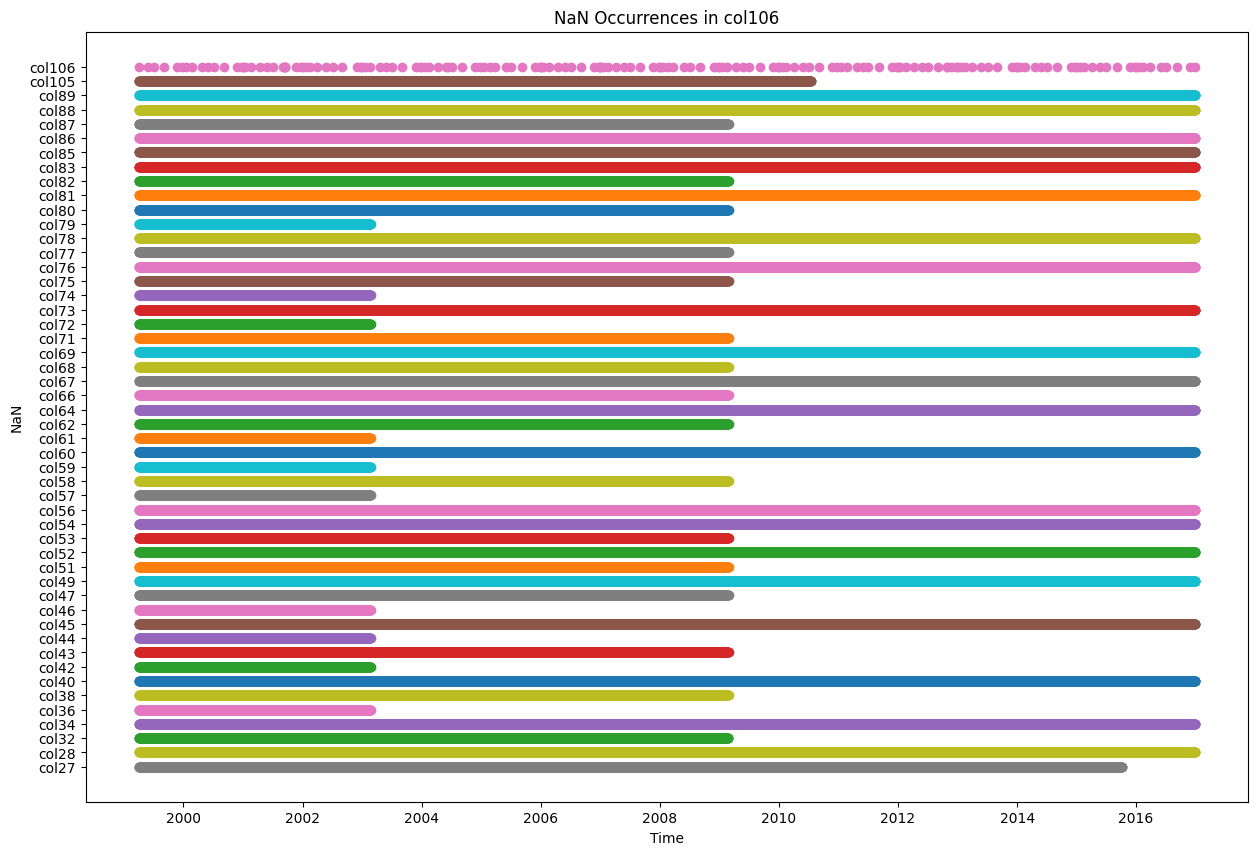

In [7]:
# 一時的にデータ列名を変更
tmp_df = df_data.copy()
tmp_df_dict = make_nanplot(tmp_df)

In [8]:
print(tmp_df_dict)

{'col0': 'リターン_目的変数関連_米国株（先物）_ESIndex', 'col1': 'リターン_目的変数関連_米国債（先物）_TYComdty', 'col2': 'リターン_目的変数関連_株40債券60ポート_TargetPortDailyRtn', 'col3': 'リターン_主要指数_日本株（先物）_NKIndex', 'col4': 'リターン_主要指数_日本債（先物）_JBComdty', 'col5': 'リターン_主要指数_欧州株（先物）_VGIndex', 'col6': 'リターン_主要指数_欧州債（先物）_RXComdty', 'col7': 'リターン_主要指数_香港株（先物）_HIIndex', 'col8': 'リターン_主要指数_EM株（指数）_MXEFIndex', 'col9': '原数値_クレジット系_IG トータルリターン_LUACTRUUIndex', 'col10': '原数値_クレジット系_IG トータルリターン(円建)_LUACTRJHIndex', 'col11': '原数値_クレジット系_Aaa社債 トータルリターン_LCA3TRUUIndex', 'col12': '原数値_クレジット系_Aa社債 トータルリターン_LCA2TRUUIndex', 'col13': '原数値_クレジット系_A社債 トータルリターン_LCA1TRUUIndex', 'col14': '原数値_クレジット系_Baa社債 トータルリターン_LCB1TRUUIndex', 'col15': '原数値_クレジット系_BB社債 トータルリターン_BCBATRUUIndex', 'col16': '原数値_クレジット系_B社債 トータルリターン_BCBHTRUUIndex', 'col17': '原数値_クレジット系_EM トータルリターン_EMUSTRUUIndex', 'col18': '原数値_米国株セクター指数_セクター指数（テクノロジー）_XLKEquity', 'col19': '原数値_米国株セクター指数_セクター指数（フィナンシャル）_XLFEquity', 'col20': '原数値_米国株セクター指数_セクター指数（ヘルスケア）_XLVEquity', 'col21': '原数値_米国株セクター指数_セクター指数（エ

In [9]:
nan_stats = []

for column in df_data.columns:
    nan_count = df_data[column].isna().sum()
    total_count = len(df_data[column])
    nan_percentage = round(nan_count / total_count * 100, 6)
    if nan_count > 0:
        first_nan_date = df_data.index[df_data[column].isna()][0]
        second_nan_date = df_data.index[df_data[column].isna()][2]
        last_nan_date = df_data.index[df_data[column].isna()][-1]
    else:
        first_nan_date = None
        second_nan_date = None
        last_nan_date = None

    nan_stats.append({
        'Column': column,
        'NaN Percentage': nan_percentage,
        'First NaN Date': first_nan_date,
        'Second NaN Date': second_nan_date,
        'Last NaN Date': last_nan_date
    })

nan_stats_df = pd.DataFrame(nan_stats)
nan_stats_df = nan_stats_df[nan_stats_df['NaN Percentage'] > 0].sort_values(by='NaN Percentage', ascending=False).reset_index(drop=True)
nan_stats_df

,Column,NaN Percentage,First NaN Date,Second NaN Date,Last NaN Date
0,原数値_金利系_米金利バタフライ2-5-20_BF020520Index,100.000000,1999-04-01,1999-04-05,2016-12-30
1,原数値_金利系_米金利バタフライ3-10-20_BF031020Index,100.000000,1999-04-01,1999-04-05,2016-12-30
2,原数値_金利系_米金利バタフライ2-7-20_BF020720Index,100.000000,1999-04-01,1999-04-05,2016-12-30
3,原数値_金利系_米金利スプレッド30年-20年_USYC2030Index,100.000000,1999-04-01,1999-04-05,2016-12-30
4,原数値_金利系_米金利スプレッド20年-10年_USYC1020Index,100.000000,1999-04-01,1999-04-05,2016-12-30
5,原数値_金利系_米金利バタフライ2-10-20_BF021020Index,100.000000,1999-04-01,1999-04-05,2016-12-30
6,原数値_金利系_米金利スプレッド20年-7年_USYC7Y20Index,100.000000,1999-04-01,1999-04-05,2016-12-30
7,原数値_金利系_米金利バタフライ3-5-20_BF030520Index,100.000000,1999-04-01,1999-04-05,2016-12-30
8,原数値_金利系_米金利スプレッド20年-5年_USYC5Y20Index,100.000000,1999-04-01,1999-04-05,2016-12-30
9,原数値_金利系_米金利バタフライ3-7-20_BF030720Index,100.000000,1999-04-01,1999-04-05,2016-12-30


In [10]:
nan_stats_df['NaN Percentage'].unique()

array([100.      ,  93.048359,  63.622625,  55.829016,  55.807427,
        21.977547,   3.540587])

# それぞれの列に対して分析
## 100%の列は当然データなし（念のため確認）

In [11]:
print(df_data['原数値_金利系_米金利バタフライ2-5-20_BF020520Index'])

データ種類_カテゴリ_nan_Dates
1999-04-01    NaN
1999-04-02    NaN
1999-04-05    NaN
1999-04-06    NaN
1999-04-07    NaN
             ... 
2016-12-26    NaN
2016-12-27    NaN
2016-12-28    NaN
2016-12-29    NaN
2016-12-30    NaN
Name: 原数値_金利系_米金利バタフライ2-5-20_BF020520Index, Length: 4632, dtype: object


## 93.048359%の列

1


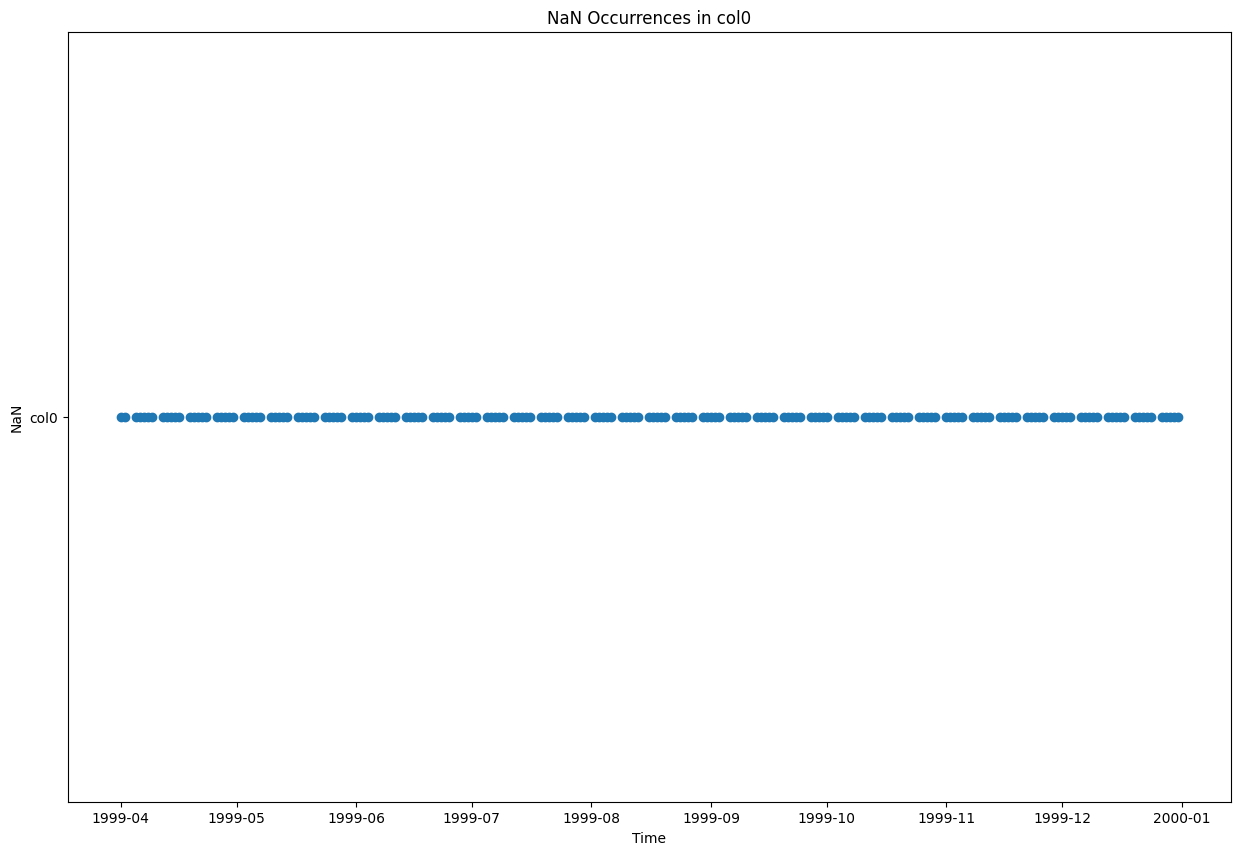

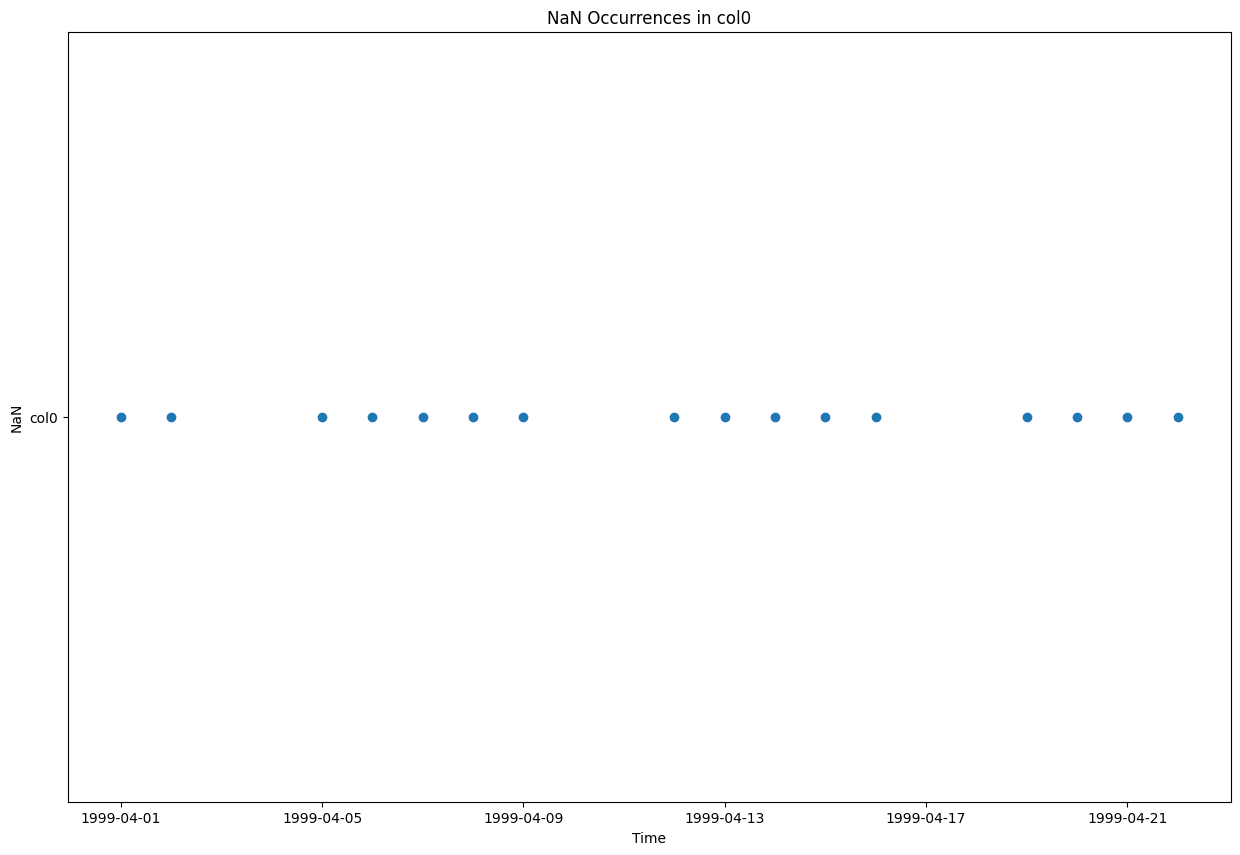

{'col0': '原数値_米国株セクター指数_セクター指数（不動産）_XLREEquity'}


In [12]:
column_9304 = nan_stats_df[nan_stats_df['NaN Percentage'] == 93.048359]['Column']
print(len(column_9304))
df_9304 = df_data.loc[:'1999-12-31', column_9304]
df_9304_dict = make_nanplot(df_9304)
df_9304_seg = df_data.loc[:'1999-04-22', column_9304]
df_9304_dict = make_nanplot(df_9304_seg)
print(df_9304_dict)

## 63.622625%の列

1


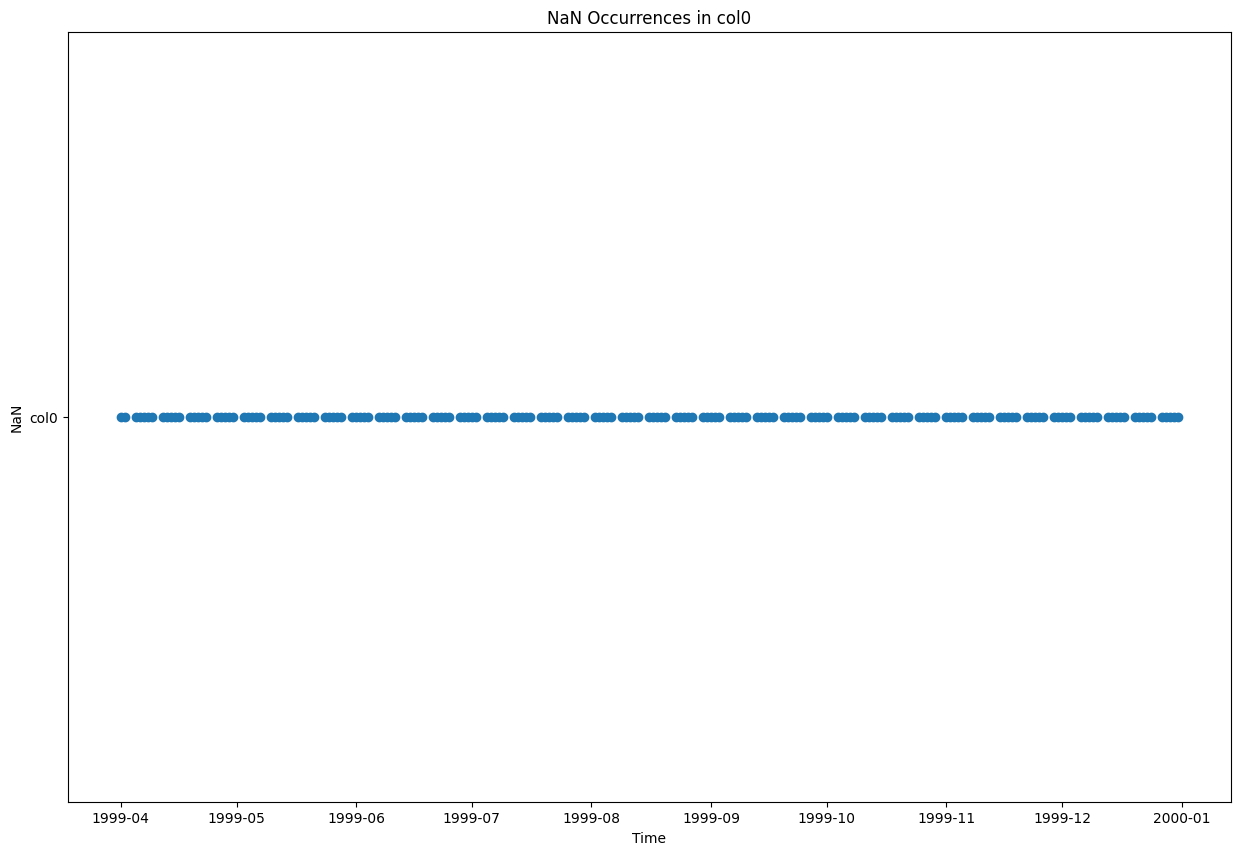

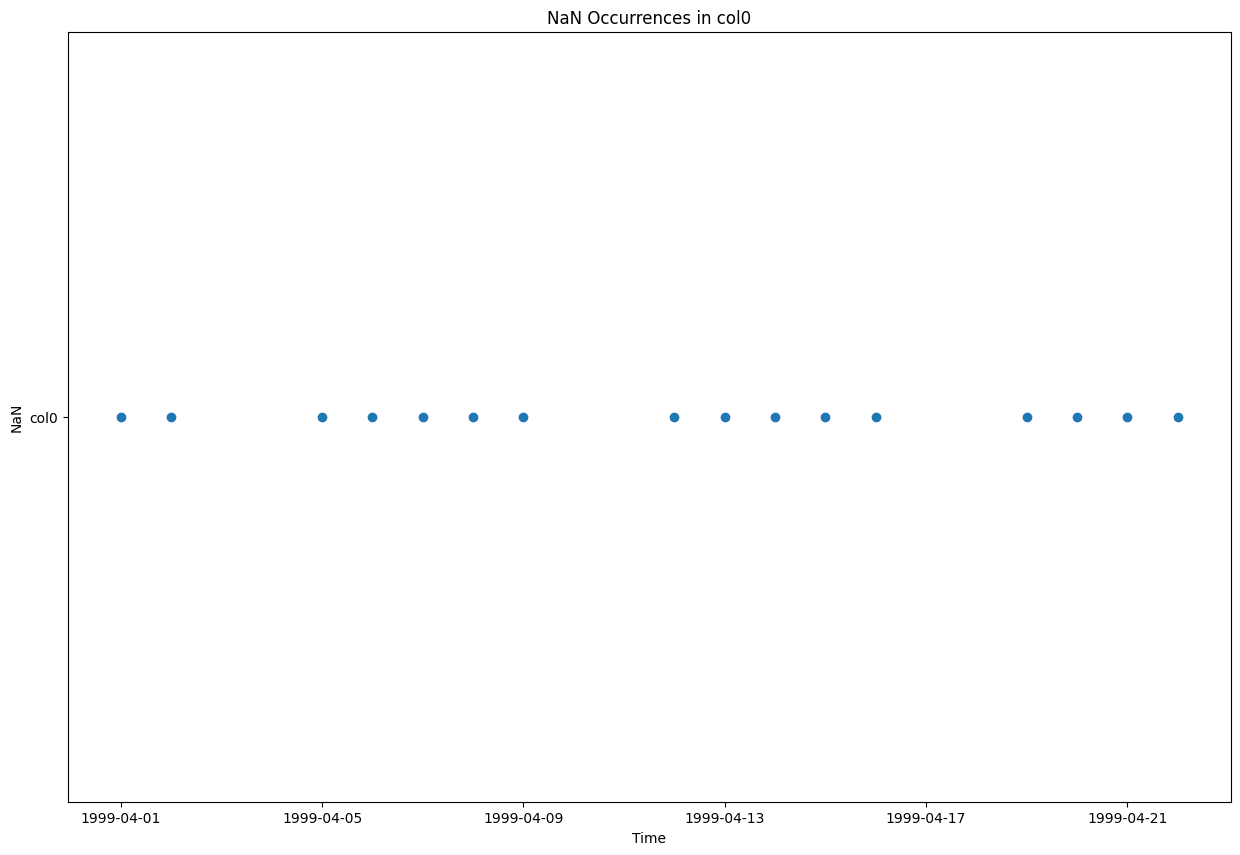

{'col0': '原数値_商品系_ビットコイン_XBTCurncy'}


In [13]:
column_6362 = nan_stats_df[nan_stats_df['NaN Percentage'] == 63.622625]['Column']
print(len(column_6362))
df_6362 = df_data.loc[:'1999-12-31', column_6362]
df_6362_dict = make_nanplot(df_6362)
df_6362_seg = df_data.loc[:'1999-04-22', column_6362]
df_6362_dict = make_nanplot(df_6362_seg)
print(df_6362_dict)

## 55.829016%の列

15


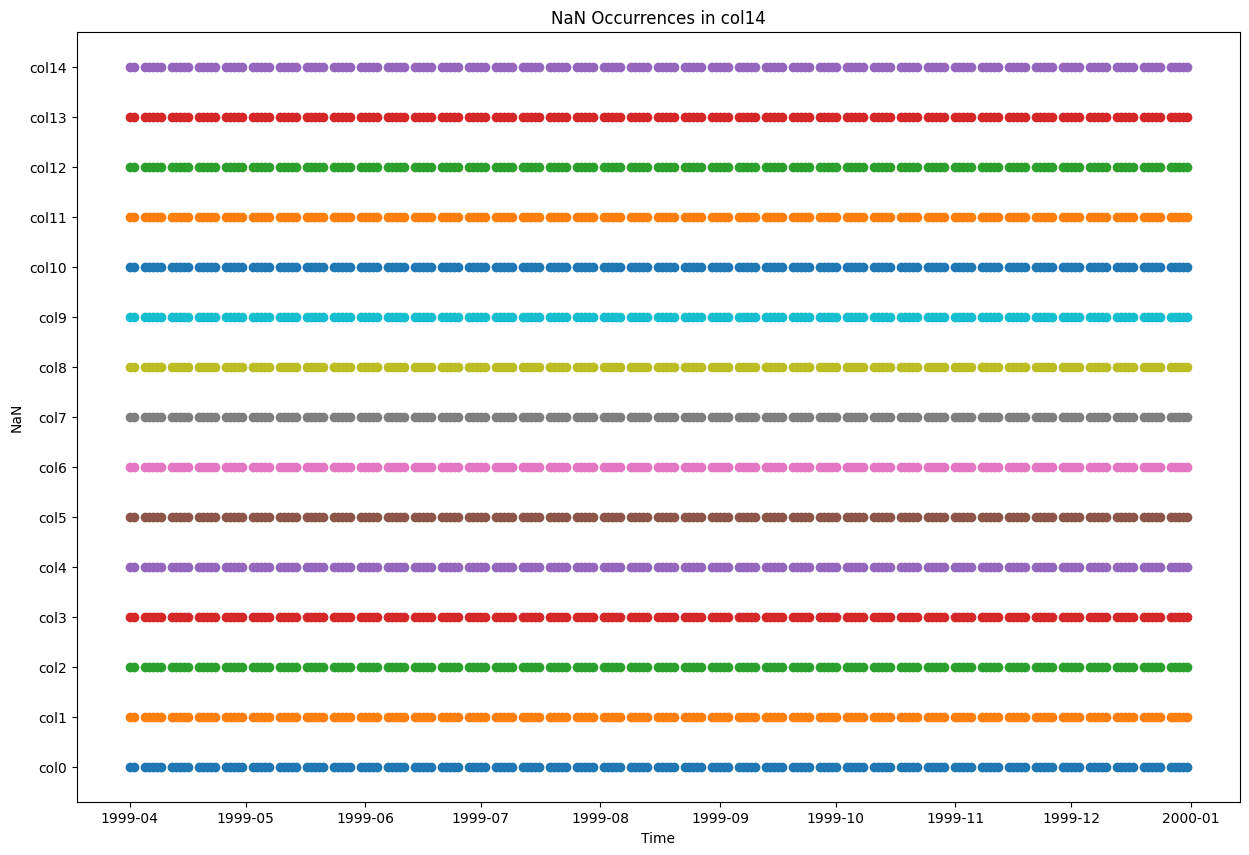

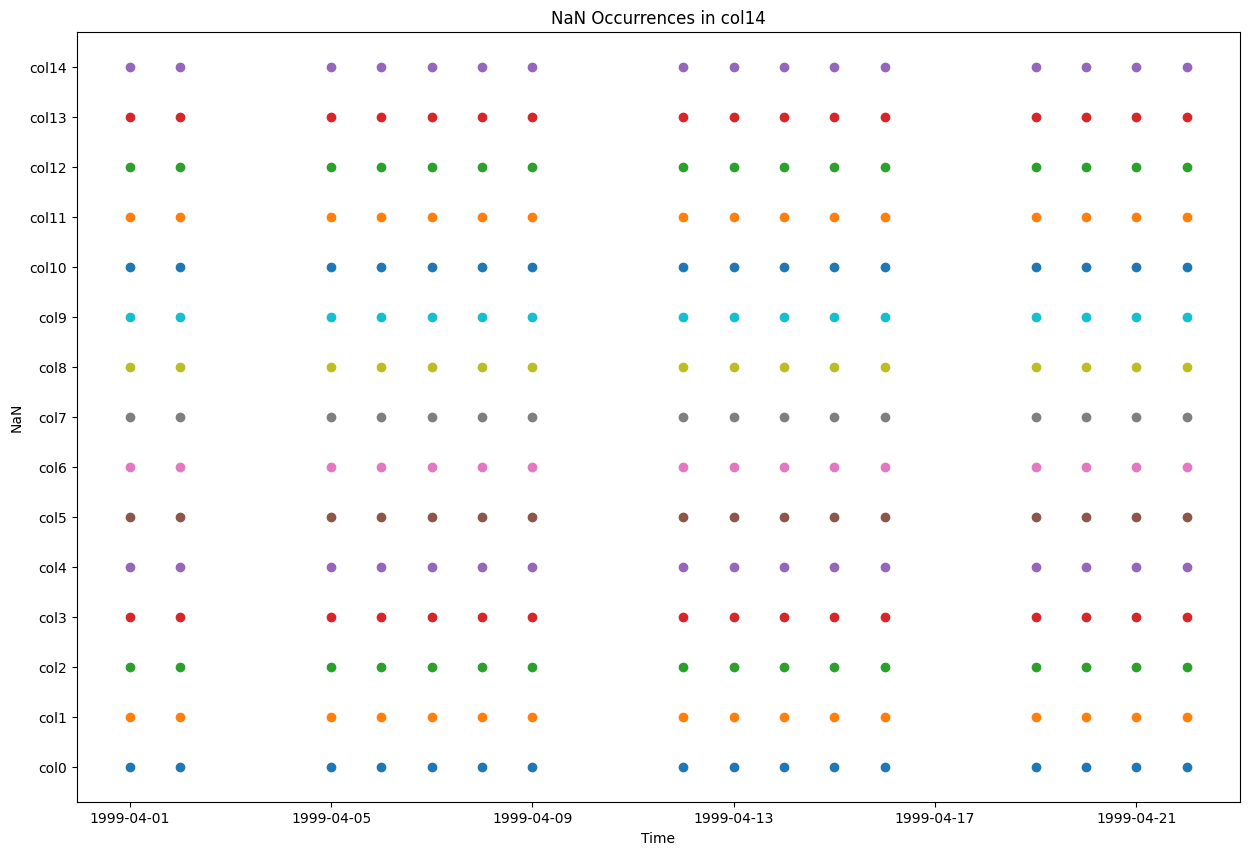

{'col0': '原数値_金利系_米金利バタフライ3-7-30_BF030730Index', 'col1': '原数値_金利系_米金利バタフライ5-7-30_BF050730Index', 'col2': '原数値_金利系_米金利バタフライ5-7-10_BF050710Index', 'col3': '原数値_金利系_米金利スプレッド7年-2年_USYC2Y7YIndex', 'col4': '原数値_金利系_米金利バタフライ7-10-30_BF071030Index', 'col5': '原数値_金利系_米金利スプレッド7年-5年_USYC5Y7YIndex', 'col6': '原数値_金利系_米金利バタフライ3-7-10_BF030710Index', 'col7': '原数値_金利系_米金利スプレッド10年-7年_USYC7Y10Index', 'col8': '原数値_金利系_米金利スプレッド7年-3年_USYC3Y7YIndex', 'col9': '原数値_金利系_米金利バタフライ3-5-7_BF030507Index', 'col10': '原数値_金利系_米金利スプレッド30年-7年_USYC7Y30Index', 'col11': '原数値_金利系_米金利バタフライ2-7-30_BF020730Index', 'col12': '原数値_金利系_米金利バタフライ2-7-10_BF020710Index', 'col13': '原数値_金利系_米金利バタフライ2-3-7_BF020307Index', 'col14': '原数値_金利系_米金利バタフライ2-5-7_BF020507Index'}


In [14]:
column_5582 = nan_stats_df[nan_stats_df['NaN Percentage'] == 55.829016]['Column']
print(len(column_5582))
df_5582 = df_data.loc[:'1999-12-31', column_5582]
df_5582_dict = make_nanplot(df_5582)
df_5582_seg = df_data.loc[:'1999-04-22', column_5582]
df_5582_dict = make_nanplot(df_5582_seg)
print(df_5582_dict)

## 21.977547%の列

10


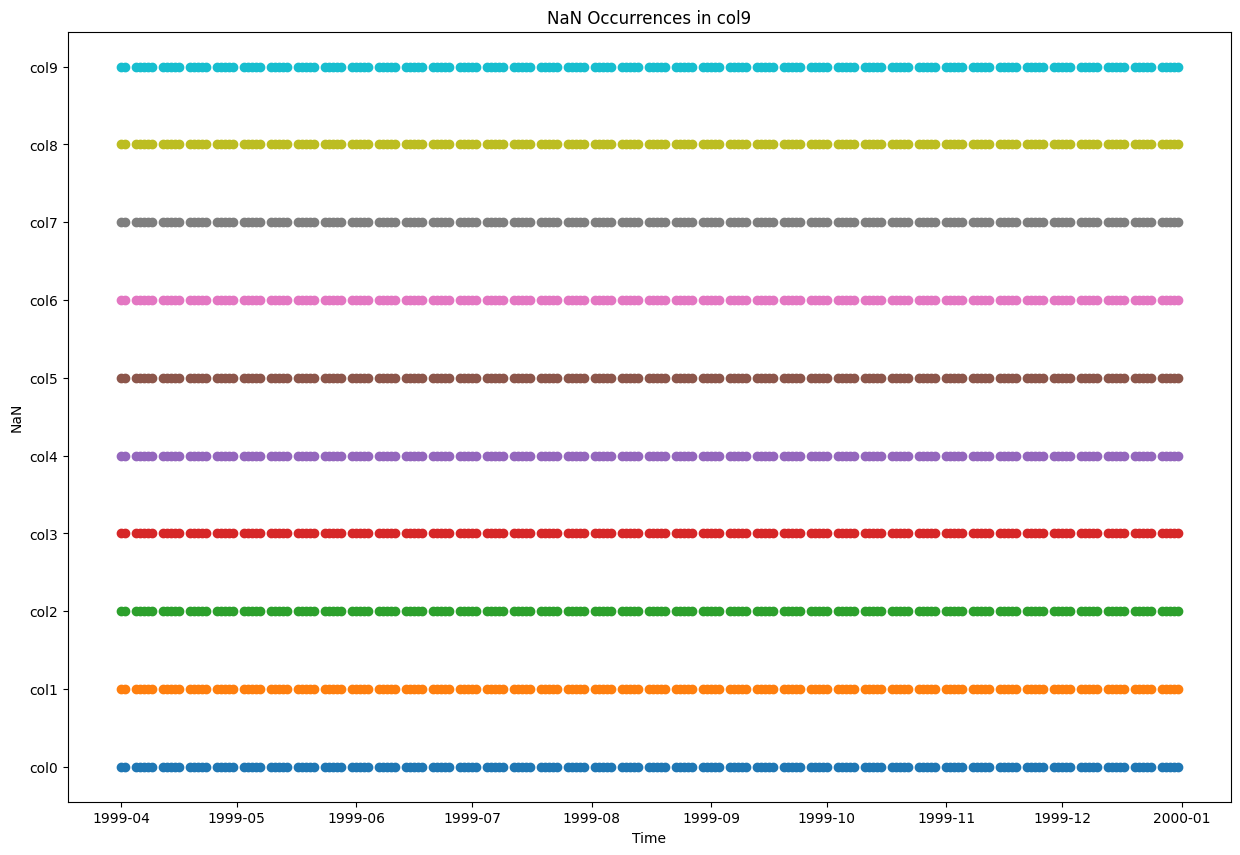

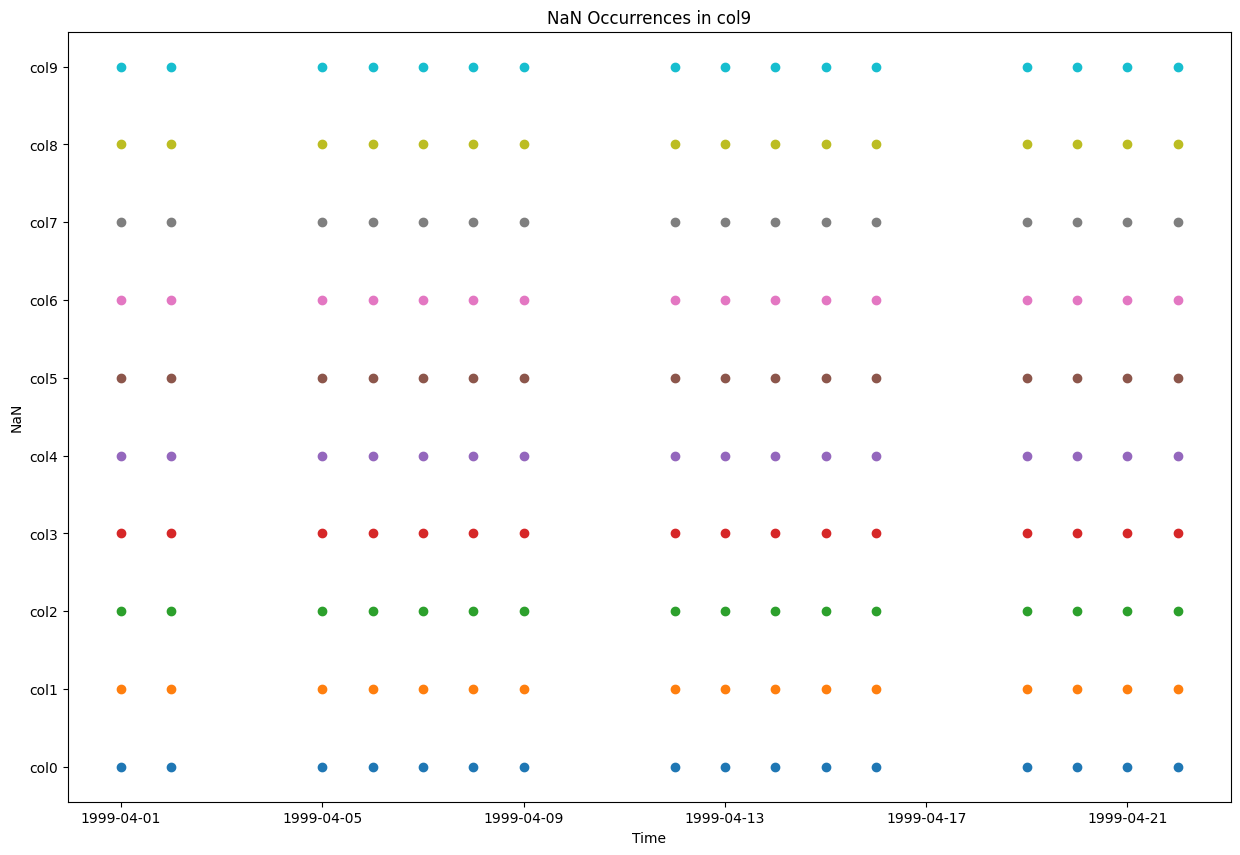

{'col0': '原数値_金利系_米金利スプレッド3年-2年_USYC2Y3YIndex', 'col1': '原数値_金利系_米金利スプレッド5年-3年_USYC3Y5YIndex', 'col2': '原数値_金利系_米金利バタフライ2-3-10_BF020310Index', 'col3': '原数値_金利系_米金利スプレッド10年-3年_USYC3Y10Index', 'col4': '原数値_金利系_米金利バタフライ3-10-30_BF031030Index', 'col5': '原数値_金利系_米金利スプレッド30年-3年_USYC3Y30Index', 'col6': '原数値_金利系_米金利バタフライ2-3-30_BF020330Index', 'col7': '原数値_金利系_米金利バタフライ3-5-30_BF030530Index', 'col8': '原数値_金利系_米金利バタフライ3-5-10_BF030510Index', 'col9': '原数値_金利系_米金利バタフライ2-3-5_BF020305Index'}


In [15]:
column_2197 = nan_stats_df[nan_stats_df['NaN Percentage'] == 21.977547]['Column']
print(len(column_2197))
df_2197 = df_data.loc[:'1999-12-31', column_2197]
df_2197_dict = make_nanplot(df_2197)
df_2197_seg = df_data.loc[:'1999-04-22', column_2197]
df_2197_dict = make_nanplot(df_2197_seg)
print(df_2197_dict)

## 3.540587%の列

1


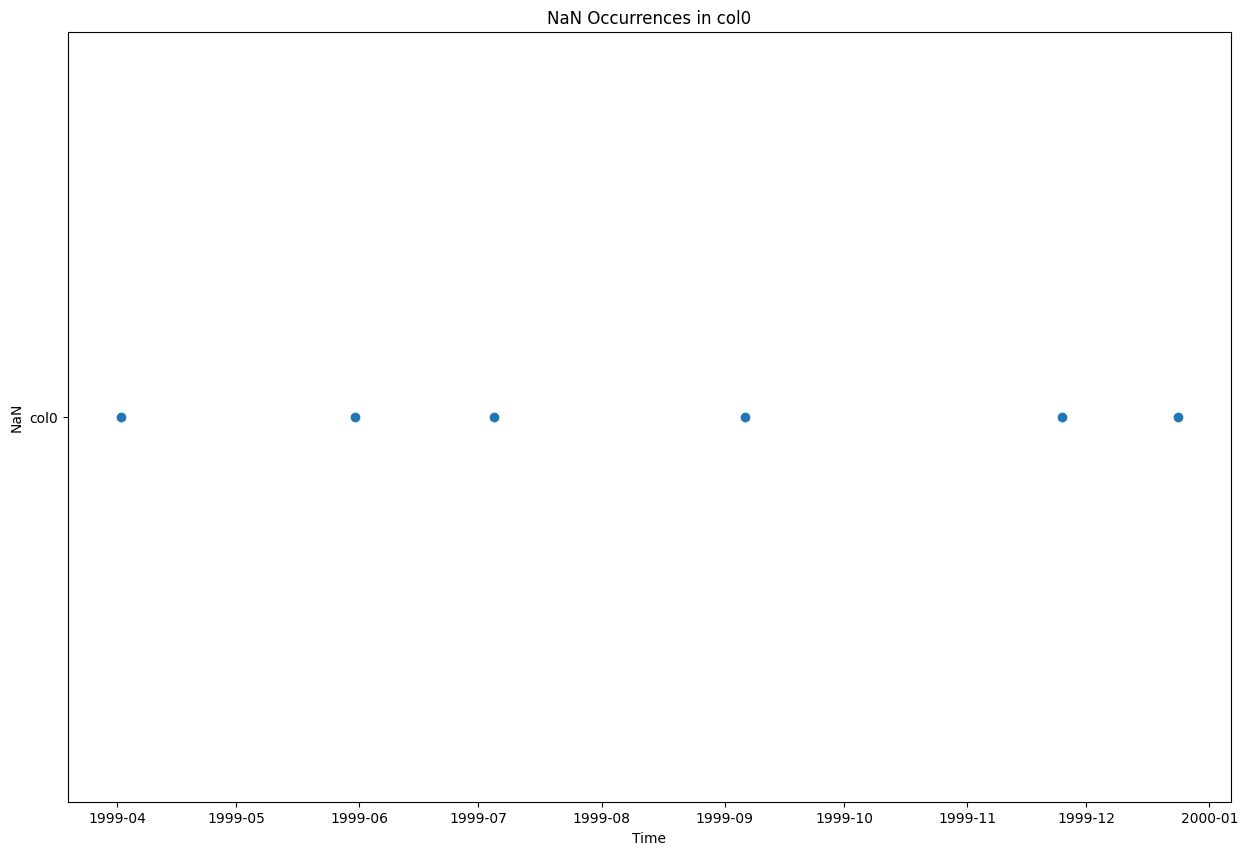

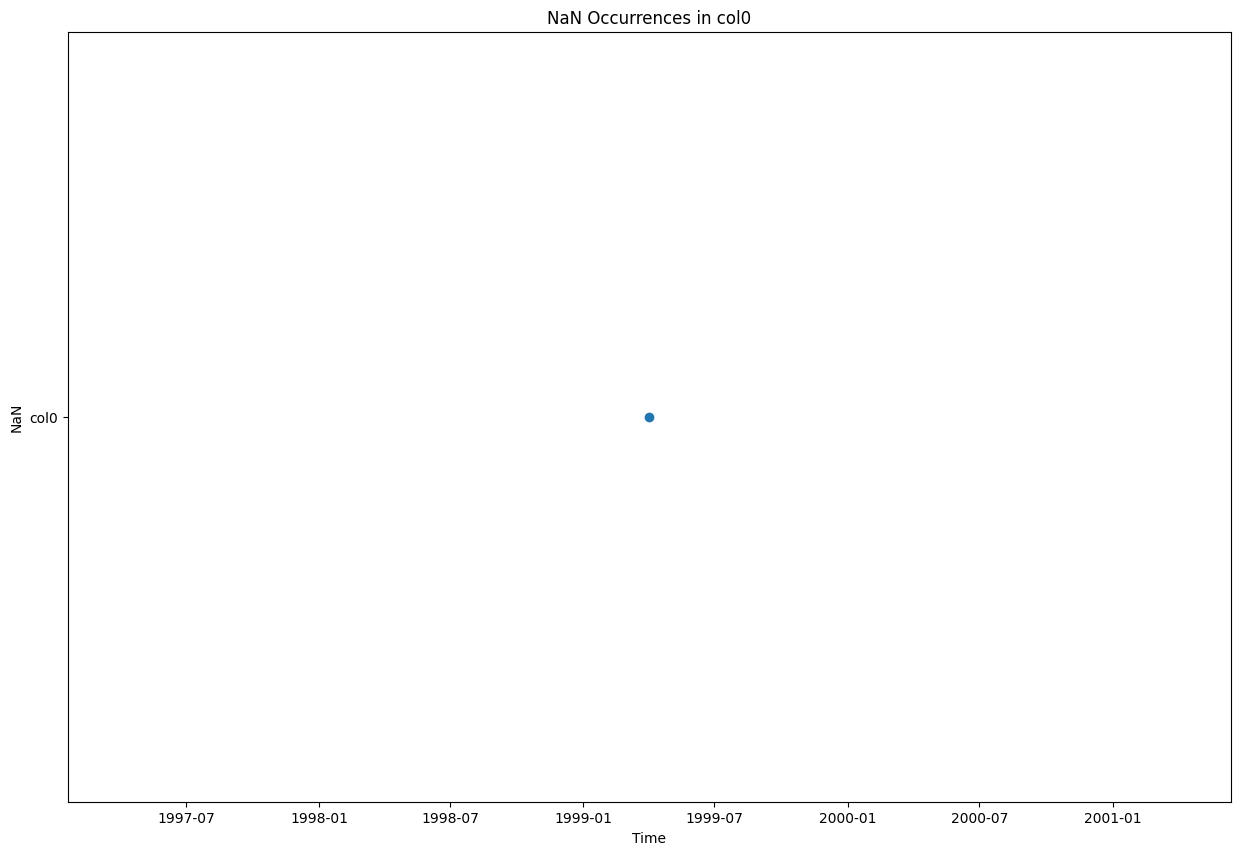

{'col0': '原数値_その他_VIX_VIXIndex'}


In [16]:
column_３５４０ = nan_stats_df[nan_stats_df['NaN Percentage'] == 3.540587]['Column']
print(len(column_3540))
df_3540 = df_data.loc[:'1999-12-31', column_3540]
df_3540_dict = make_nanplot(df_3540)
df_3540_seg = df_data.loc[:'1999-04-22', column_3540]
df_3540_dict = make_nanplot(df_3540_seg)
print(df_3540_dict)